<a href="https://colab.research.google.com/github/AdityaDhiman05/UPI-Fraud-Detection-Project/blob/main/DAY_4_CAPSTONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving upi_cleaned.csv to upi_cleaned.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 12

os.makedirs('images', exist_ok=True)


Loading cleaned dataset from pervious day

In [4]:
df = pd.read_csv("upi_cleaned.csv")

df['Month'] = pd.to_datetime(df['Month'])
df = df.sort_values('Month').reset_index(drop=True)

df.head()


,Month,Banks_Live,Volume_Mn,Value_Cr,Avg_Txn_Value_INR,MoM_Growth_Volume_%,MoM_Growth_Value_%,Year,Month_Num,Quarter
0,2016-04-01,21,0.00,0.00,NaN,NaN,NaN,2016,4,2
1,2016-05-01,21,0.00,0.00,NaN,NaN,NaN,2016,5,2
2,2016-06-01,21,0.00,0.00,NaN,NaN,NaN,2016,6,2
3,2016-07-01,21,0.09,0.38,42.222222,inf,inf,2016,7,3
4,2016-08-01,21,0.09,3.09,343.333333,0.0,713.157895,2016,8,3


Visualizing combined graph for value and volume

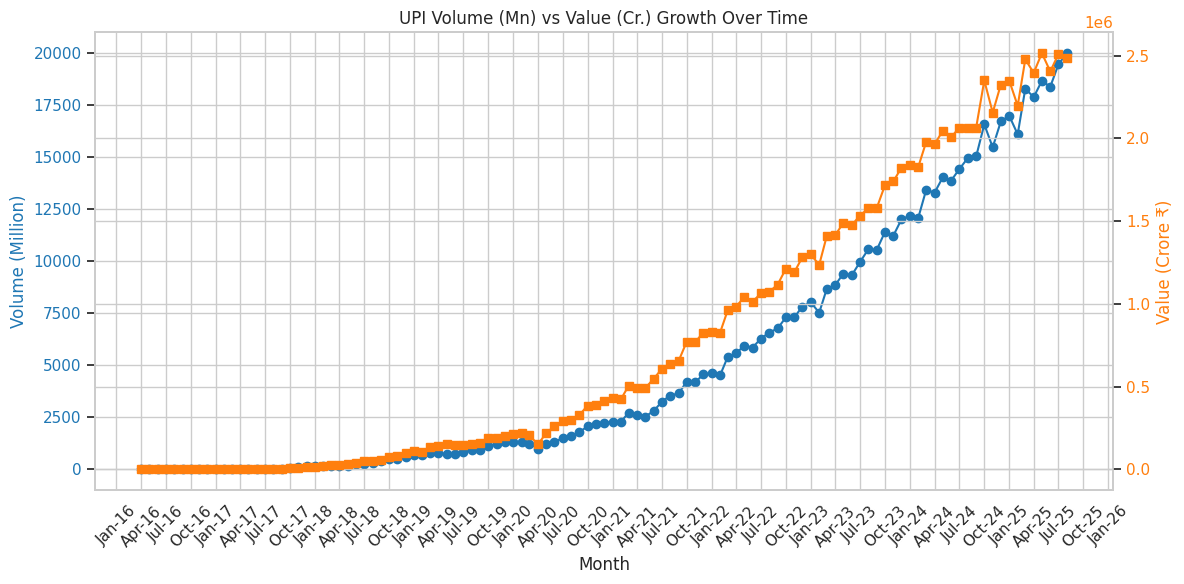

In [5]:
fig, ax1 = plt.subplots()

ax1.plot(df['Month'], df['Volume_Mn'], marker='o', label='Volume (Mn)', color="tab:blue")
ax1.set_xlabel("Month")
ax1.set_ylabel("Volume (Million)", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
plt.xticks(rotation=45)

ax2 = ax1.twinx()
ax2.plot(df['Month'], df['Value_Cr'], marker='s', label='Value (Cr.)', color="tab:orange")
ax2.set_ylabel("Value (Crore ₹)", color="tab:orange")
ax2.tick_params(axis='y', labelcolor="tab:orange")

plt.title("UPI Volume (Mn) vs Value (Cr.) Growth Over Time")
fig.tight_layout()
fig.savefig("images/volume_value_combined.png", dpi=200, bbox_inches="tight")
plt.show()


Visualizing Banks Live growth over the time

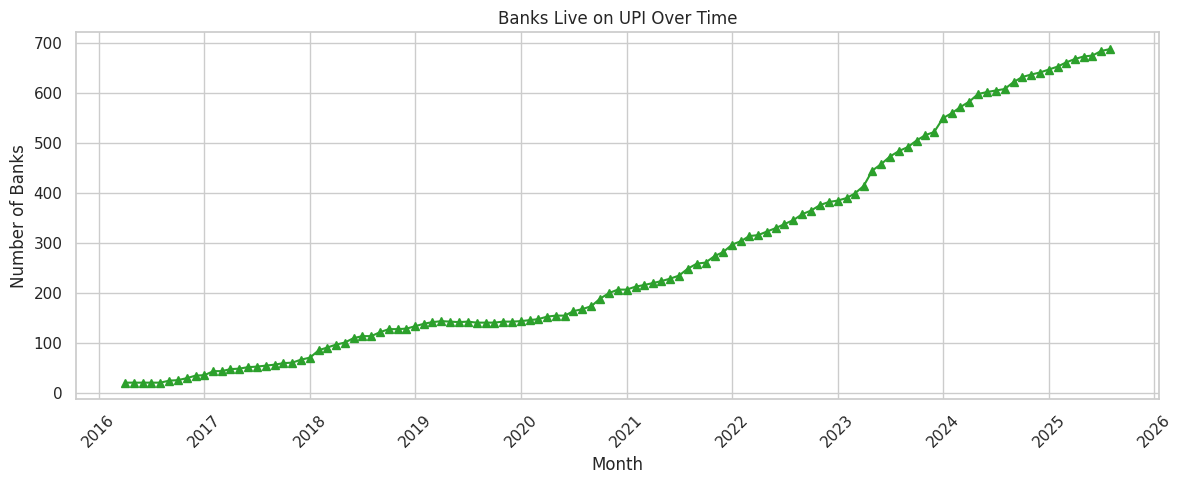

In [6]:
plt.figure(figsize=(12,5))
plt.plot(df['Month'], df['Banks_Live'], marker='^', color="tab:green")
plt.title("Banks Live on UPI Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Banks")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.savefig("images/banks_live_growth.png", dpi=200, bbox_inches="tight")
plt.show()


Yearly Aggregate

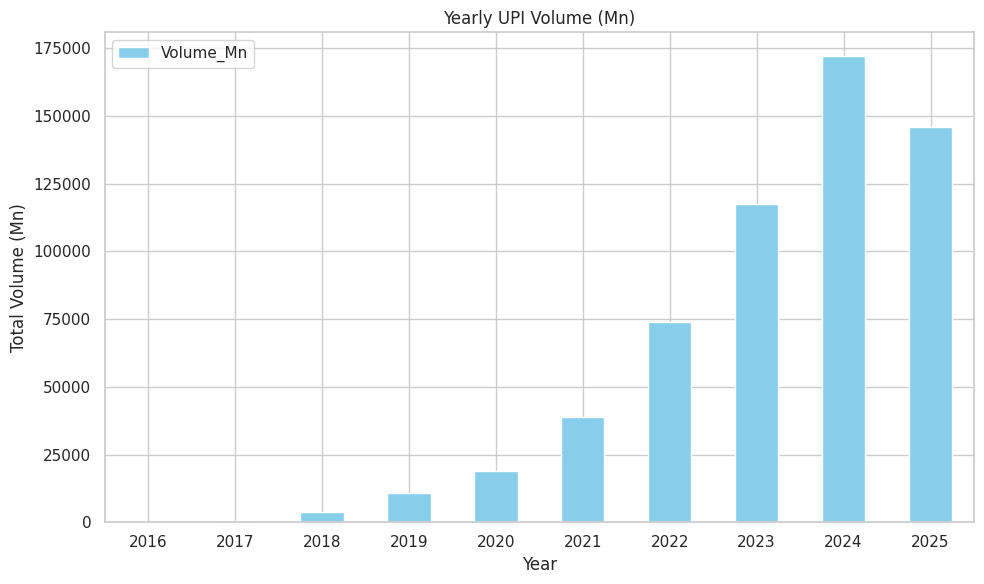

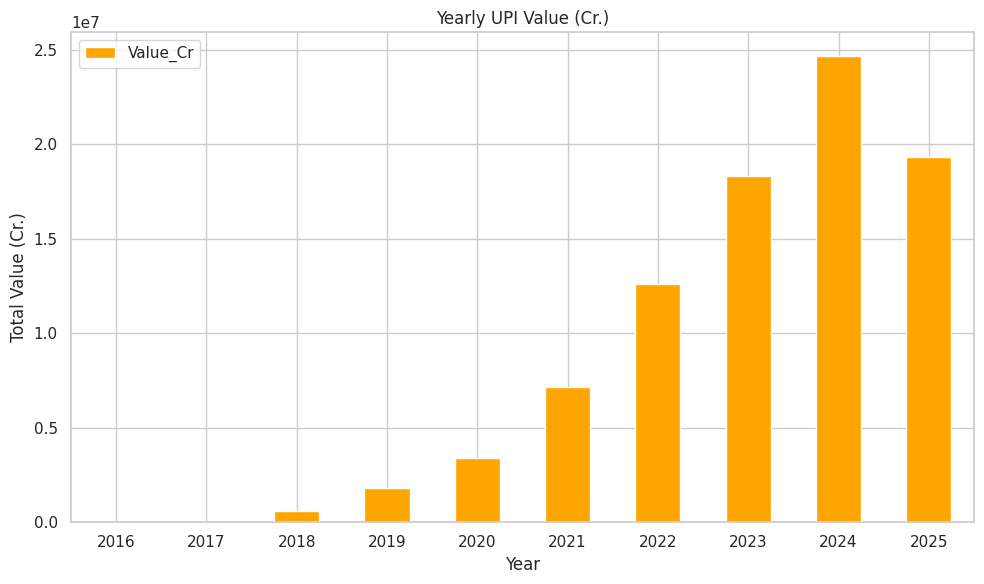

In [9]:
# Yearly Volume
yearly.plot(x='Month', y='Volume_Mn', kind='bar', color="skyblue", figsize=(10,6))
plt.title("Yearly UPI Volume (Mn)")
plt.xlabel("Year")
plt.ylabel("Total Volume (Mn)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Yearly Value
yearly.plot(x='Month', y='Value_Cr', kind='bar', color="orange", figsize=(10,6))
plt.title("Yearly UPI Value (Cr.)")
plt.xlabel("Year")
plt.ylabel("Total Value (Cr.)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

